## Project Description: Next Word Prediction Using LSTM, RNN and GRU
#### Project Overview:

This project aims to develop a deep learning model for predicting the next word in a given sequence of words. The model is built using Long Short-Term Memory (LSTM) networks, RNN and GRU, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: I use the texts about honey bee and its types as my dataset. This rich, complex text provides a good challenge for our model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word. Then RNN and GRU models are created.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.

<font color = 'blue' size="5px">
Content: 

1. [Data Collection](#1)
1. [Data Preprocessing](#2)
1. [LSTM](#3)
1. [GRU](#4)
1. [Prediction](#5)

<a href = "1"></a>
## Data Collection

In [1]:
## Data Collection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from tqdm.auto import tqdm
import pickle

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = "C:\\Users\\reiseren\\Desktop\\LSTM_RNN\\bal\\corpus\\"
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['ari.txt',
 'bombus.txt',
 'esek_arisi.txt',
 'isci_ari.txt',
 'kralice_ari.txt',
 'yaban_arisi.txt']

In [3]:
file_ids = wordlists.fileids()

<a id = "2"></a>
## Data Preprocessing

In [4]:
wordlists.raw()

'Arı\r\nArı, zar kanatlılar takımına ait Apoidea familyasını oluşturan tüm böcek türlerine verilen isimdir.\r\n\r\nZar kanatlıların özelliği; içinde enine ve boyuna damarcıklar bulunan ve iki çift saydam zar şeklinde kanatlarının olmasıdır. Arıların vücudu baş, göğüs ve karın olmak üzere üç kısımdan meydana gelir. Vücutları yumuşak yapıdaki yoğun bir kıl örtüsüyle kaplıdır.Kılların rengi türe göre değişkendir\r\n\r\nBir bal arısı kolonisi yıllık 15–75 kg polen tüketir. Gündelik yaşamlarını sürdürmek adına 1 kg bal üretmek için 8 kg bal tüketirler. Günde 200 gram suya ihtiyaç duyabilirler.\r\n\r\nEvrim ve taksonomi\r\nBal arıları, aslında prederatör (böcek yiyen) bir familyanın alt üyesidirler ve artık böcek yemeyi bırakmışlardır. Aynı familya içerisinde diğer arılardan yaban arısı, eşek arısı, marangoz arı (Xylocopa, Carpenter bee), bombus gibi türler de bulunur.\r\n\r\nBal arısı ana arı, erkek arılar ve işçi arılardan oluşur. Yavruları ana arı yapar. Döllenmiş yumurtalardan işçi ve An

In [5]:
text = wordlists.raw()

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
# Türkçe stopwords listesi
turkish_stopwords = set(stopwords.words('turkish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reiseren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean_text(text):
    text = re.sub('<[^>]*>', '', text) # remove HTML tags
    text = re.sub('\d+', '', text) # remove numbers
    text = re.sub(r'[^\w\s\n\r]', '', text).lower() # first r is raw string indicator, remove punctation beside keep \n\r chars and lower case
    words = re.split(r'(\s+)', text)
    filtered_text = [word for word in words if word not in turkish_stopwords]
    text = ' '.join(filtered_text)
    text = re.sub(' +', ' ', text) # remove punctuation
    return text

In [8]:
text = clean_text(text)

In [9]:
text

'arı \r\n arı zar kanatlılar takımına ait apoidea familyasını oluşturan böcek türlerine verilen isimdir \r\n\r\n zar kanatlıların özelliği içinde enine boyuna damarcıklar bulunan iki çift saydam zar şeklinde kanatlarının olmasıdır arıların vücudu baş göğüs karın olmak üzere üç kısımdan meydana gelir vücutları yumuşak yapıdaki yoğun bir kıl örtüsüyle kaplıdırkılların rengi türe göre değişkendir \r\n\r\n bir bal arısı kolonisi yıllık kg polen tüketir gündelik yaşamlarını sürdürmek adına kg bal üretmek kg bal tüketirler günde gram suya ihtiyaç duyabilirler \r\n\r\n evrim taksonomi \r\n bal arıları prederatör böcek yiyen bir familyanın alt üyesidirler artık böcek yemeyi bırakmışlardır aynı familya içerisinde diğer arılardan yaban arısı eşek arısı marangoz arı xylocopa carpenter bee bombus türler bulunur \r\n\r\n bal arısı ana arı erkek arılar işçi arılardan oluşur yavruları ana arı yapar döllenmiş yumurtalardan işçi ana arılar döllenmemiş yumurtalardan erkek arılar meydana gelir ana arı iş

In [10]:
all_words = text.split()

In [11]:
print(len(all_words))

7347


## Word Cloud

In [12]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

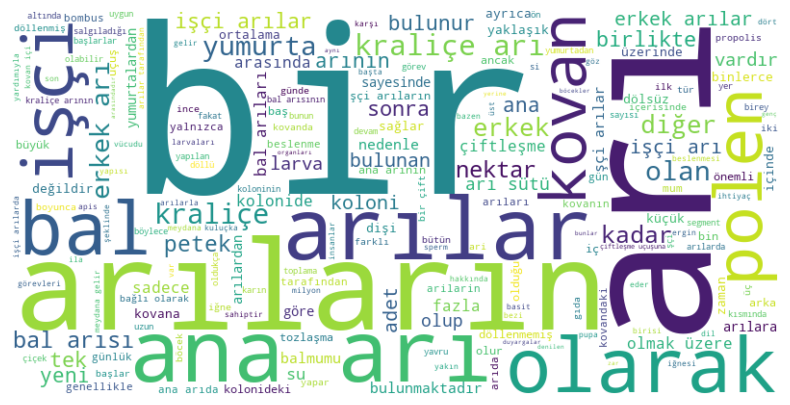

In [14]:
word_string = ' '.join(all_words)
# WordCloud oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_string)

# WordCloud'u görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle
plt.show()

## Tokenization

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [16]:
unique_elements = set(all_words)
unique_elements.remove('bir') # Exclude 'bir' word
unique_elements.remove('olarak')
all_words = [i for i in all_words if i!= 'bir' and i!= 'olarak']
print(len(unique_elements))

2972


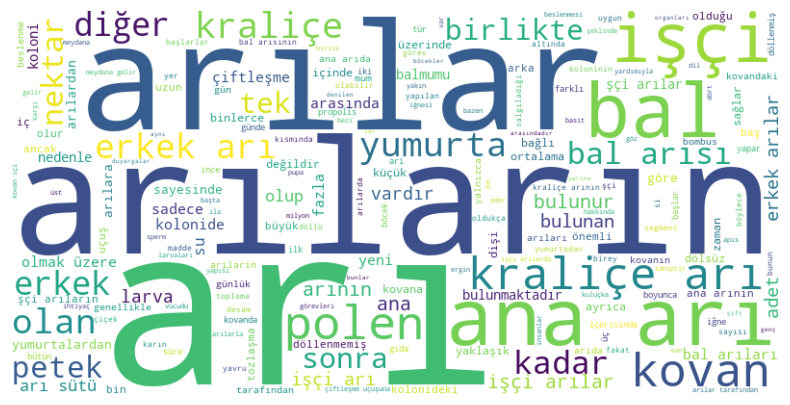

In [17]:
word_string = ' '.join(all_words)
# WordCloud oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_string)

# WordCloud'u görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle
plt.show()

In [18]:
## Tokenize the text, creating indexes for words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_words])
tokenizer.word_index

{'arı': 1,
 'arılar': 2,
 'ana': 3,
 'bal': 4,
 'işçi': 5,
 'erkek': 6,
 'arıların': 7,
 'kraliçe': 8,
 'kovan': 9,
 'polen': 10,
 'arının': 11,
 'arısı': 12,
 'kadar': 13,
 'nektar': 14,
 'i̇şçi': 15,
 'olan': 16,
 'yumurta': 17,
 'diğer': 18,
 'petek': 19,
 'arıları': 20,
 'birlikte': 21,
 'çiftleşme': 22,
 'bulunan': 23,
 'meydana': 24,
 'su': 25,
 'sonra': 26,
 'tek': 27,
 'bulunur': 28,
 'yeni': 29,
 'adet': 30,
 'arıda': 31,
 'çift': 32,
 'üzere': 33,
 'larva': 34,
 'vardır': 35,
 'fazla': 36,
 'koloni': 37,
 'olmak': 38,
 'sütü': 39,
 'olup': 40,
 'ortalama': 41,
 'tarafından': 42,
 'arasında': 43,
 'sadece': 44,
 'üzerinde': 45,
 'kovana': 46,
 'mum': 47,
 'kolonide': 48,
 'iki': 49,
 'günde': 50,
 'nedenle': 51,
 'bulunmaktadır': 52,
 'arılarda': 53,
 'balmumu': 54,
 'günlük': 55,
 'üç': 56,
 'gelir': 57,
 'göre': 58,
 'alt': 59,
 'içerisinde': 60,
 'arılardan': 61,
 'yumurtalardan': 62,
 'sayesinde': 63,
 'arılara': 64,
 'içinde': 65,
 'karın': 66,
 'ayrıca': 67,
 'sağlar': 6

In [19]:
tokenizer.index_word

{1: 'arı',
 2: 'arılar',
 3: 'ana',
 4: 'bal',
 5: 'işçi',
 6: 'erkek',
 7: 'arıların',
 8: 'kraliçe',
 9: 'kovan',
 10: 'polen',
 11: 'arının',
 12: 'arısı',
 13: 'kadar',
 14: 'nektar',
 15: 'i̇şçi',
 16: 'olan',
 17: 'yumurta',
 18: 'diğer',
 19: 'petek',
 20: 'arıları',
 21: 'birlikte',
 22: 'çiftleşme',
 23: 'bulunan',
 24: 'meydana',
 25: 'su',
 26: 'sonra',
 27: 'tek',
 28: 'bulunur',
 29: 'yeni',
 30: 'adet',
 31: 'arıda',
 32: 'çift',
 33: 'üzere',
 34: 'larva',
 35: 'vardır',
 36: 'fazla',
 37: 'koloni',
 38: 'olmak',
 39: 'sütü',
 40: 'olup',
 41: 'ortalama',
 42: 'tarafından',
 43: 'arasında',
 44: 'sadece',
 45: 'üzerinde',
 46: 'kovana',
 47: 'mum',
 48: 'kolonide',
 49: 'iki',
 50: 'günde',
 51: 'nedenle',
 52: 'bulunmaktadır',
 53: 'arılarda',
 54: 'balmumu',
 55: 'günlük',
 56: 'üç',
 57: 'gelir',
 58: 'göre',
 59: 'alt',
 60: 'içerisinde',
 61: 'arılardan',
 62: 'yumurtalardan',
 63: 'sayesinde',
 64: 'arılara',
 65: 'içinde',
 66: 'karın',
 67: 'ayrıca',
 68: 'sağlar

In [20]:
total_words = len(tokenizer.word_index)+1 # np.max(list(tokenizer.word_index.values())) + 1
total_words

2973

In [21]:
"""from transformers import BertModel, BertTokenizerFast
# Let's see how to increase the vocabulary of Bert model and tokenizer
tokenizer = BertTokenizerFast.from_pretrained("google-bert/bert-base-uncased")
model = BertModel.from_pretrained("google-bert/bert-base-uncased")

num_added_toks = tokenizer.add_tokens(all_words_lower)
print("We have added", num_added_toks, "tokens")
# Notice: resize_token_embeddings expect to receive the full size of the new vocabulary, i.e., the length of the tokenizer.
model.resize_token_embeddings(len(tokenizer))
print(tokenizer.get_added_vocab())
print("num_added_toks :", num_added_toks)
print("tokenizer info : ", tokenizer)
print("model info : ", model)"""

'from transformers import BertModel, BertTokenizerFast\n# Let\'s see how to increase the vocabulary of Bert model and tokenizer\ntokenizer = BertTokenizerFast.from_pretrained("google-bert/bert-base-uncased")\nmodel = BertModel.from_pretrained("google-bert/bert-base-uncased")\n\nnum_added_toks = tokenizer.add_tokens(all_words_lower)\nprint("We have added", num_added_toks, "tokens")\n# Notice: resize_token_embeddings expect to receive the full size of the new vocabulary, i.e., the length of the tokenizer.\nmodel.resize_token_embeddings(len(tokenizer))\nprint(tokenizer.get_added_vocab())\nprint("num_added_toks :", num_added_toks)\nprint("tokenizer info : ", tokenizer)\nprint("model info : ", model)'

In [22]:
import re

lines = re.split(r'\r\n|\r|\n', text)
## create input sequences
input_sequences=[]
all_token_list = []
for line in lines:
    token_list=tokenizer.texts_to_sequences([line])[0]
    print(line,"  ",token_list)
    all_token_list.append(token_list)
    for i in range(1,len(token_list)): # tek kelime ise ekleme model bundan next wordu predict edemez
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

arı     [1]
 arı zar kanatlılar takımına ait apoidea familyasını oluşturan böcek türlerine verilen isimdir     [1, 92, 262, 1077, 1078, 1079, 571, 263, 105, 572, 122, 1080]
    []
 zar kanatlıların özelliği içinde enine boyuna damarcıklar bulunan iki çift saydam zar şeklinde kanatlarının olmasıdır arıların vücudu baş göğüs karın olmak üzere üç kısımdan meydana gelir vücutları yumuşak yapıdaki yoğun bir kıl örtüsüyle kaplıdırkılların rengi türe göre değişkendir     [92, 573, 574, 65, 575, 576, 577, 23, 49, 32, 578, 92, 157, 579, 381, 7, 158, 78, 106, 66, 38, 33, 56, 264, 24, 57, 1081, 580, 1082, 382, 581, 582, 1083, 583, 1084, 58, 1085]
    []
 bir bal arısı kolonisi yıllık kg polen tüketir gündelik yaşamlarını sürdürmek adına kg bal üretmek kg bal tüketirler günde gram suya ihtiyaç duyabilirler     [4, 12, 584, 1086, 383, 10, 585, 1087, 586, 587, 588, 383, 4, 384, 383, 4, 1088, 50, 1089, 265, 93, 1090]
    []
 evrim taksonomi     [385, 1091]
 bal arıları prederatör böcek yiyen bir fami

In [23]:
all_token_list = [i for i in all_token_list if i != []]
all_token_list

[[1],
 [1, 92, 262, 1077, 1078, 1079, 571, 263, 105, 572, 122, 1080],
 [92,
  573,
  574,
  65,
  575,
  576,
  577,
  23,
  49,
  32,
  578,
  92,
  157,
  579,
  381,
  7,
  158,
  78,
  106,
  66,
  38,
  33,
  56,
  264,
  24,
  57,
  1081,
  580,
  1082,
  382,
  581,
  582,
  1083,
  583,
  1084,
  58,
  1085],
 [4,
  12,
  584,
  1086,
  383,
  10,
  585,
  1087,
  586,
  587,
  588,
  383,
  4,
  384,
  383,
  4,
  1088,
  50,
  1089,
  265,
  93,
  1090],
 [385, 1091],
 [4,
  20,
  1092,
  105,
  1093,
  1094,
  59,
  1095,
  266,
  105,
  1096,
  1097,
  79,
  589,
  60,
  18,
  61,
  267,
  12,
  386,
  12,
  1098,
  1,
  1099,
  1100,
  1101,
  94,
  1102,
  28],
 [4,
  12,
  3,
  1,
  6,
  2,
  5,
  61,
  387,
  388,
  3,
  1,
  107,
  108,
  62,
  5,
  3,
  2,
  80,
  62,
  6,
  2,
  24,
  57,
  3,
  1,
  5,
  1,
  268,
  389,
  34,
  269,
  123,
  95,
  270],
 [21, 385],
 [1103,
  590,
  109,
  271,
  110,
  1104,
  197,
  42,
  590,
  1105,
  591,
  1106,
  51,
  105,
 

In [24]:
input_sequences # olası kelimeleri cümleleri oluştur

[[1, 92],
 [1, 92, 262],
 [1, 92, 262, 1077],
 [1, 92, 262, 1077, 1078],
 [1, 92, 262, 1077, 1078, 1079],
 [1, 92, 262, 1077, 1078, 1079, 571],
 [1, 92, 262, 1077, 1078, 1079, 571, 263],
 [1, 92, 262, 1077, 1078, 1079, 571, 263, 105],
 [1, 92, 262, 1077, 1078, 1079, 571, 263, 105, 572],
 [1, 92, 262, 1077, 1078, 1079, 571, 263, 105, 572, 122],
 [1, 92, 262, 1077, 1078, 1079, 571, 263, 105, 572, 122, 1080],
 [92, 573],
 [92, 573, 574],
 [92, 573, 574, 65],
 [92, 573, 574, 65, 575],
 [92, 573, 574, 65, 575, 576],
 [92, 573, 574, 65, 575, 576, 577],
 [92, 573, 574, 65, 575, 576, 577, 23],
 [92, 573, 574, 65, 575, 576, 577, 23, 49],
 [92, 573, 574, 65, 575, 576, 577, 23, 49, 32],
 [92, 573, 574, 65, 575, 576, 577, 23, 49, 32, 578],
 [92, 573, 574, 65, 575, 576, 577, 23, 49, 32, 578, 92],
 [92, 573, 574, 65, 575, 576, 577, 23, 49, 32, 578, 92, 157],
 [92, 573, 574, 65, 575, 576, 577, 23, 49, 32, 578, 92, 157, 579],
 [92, 573, 574, 65, 575, 576, 577, 23, 49, 32, 578, 92, 157, 579, 381],
 [92

In [25]:
## Pad Sequences
max_sequence_len=max([len(x) for x in input_sequences])
print(f"oluşan max sentence'in uzunluğunu bul : {max_sequence_len}")

oluşan max sentence'in uzunluğunu bul : 143


In [26]:
# padding all sentences based on the longest sentence length
input_sequences=np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,   92],
       [   0,    0,    0, ...,    1,   92,  262],
       [   0,    0,    0, ...,   92,  262, 1077],
       ...,
       [   0,    0,    0, ..., 2970, 2971,  267],
       [   0,    0,    0, ..., 2971,  267,   12],
       [   0,    0,    0, ...,  267,   12, 2972]])

In [27]:
##create predicitors and label
import tensorflow as tf
X, y = input_sequences[:,:-1], input_sequences[:,-1] # tüm cümlelerin son kelimesini target yaptim bunu tahmin etmeye çalışacağım.

In [28]:
y

array([  92,  262, 1077, ...,  267,   12, 2972])

In [29]:
X

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,   92],
       [   0,    0,    0, ...,    1,   92,  262],
       ...,
       [   0,    0,    0, ..., 1076, 2970, 2971],
       [   0,    0,    0, ..., 2970, 2971,  267],
       [   0,    0,    0, ..., 2971,  267,   12]])

In [30]:
y = tf.keras.utils.to_categorical(y,num_classes=total_words) # num_classes = 3099
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
""" keras to_categorical usage
Example:

>>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
>>> a = tf.constant(a, shape=[4, 4])
>>> print(a)
tf.Tensor(
  [[1. 0. 0. 0.]
   [0. 1. 0. 0.]
   [0. 0. 1. 0.]
   [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)
"""

' keras to_categorical usage\nExample:\n\n>>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)\n>>> a = tf.constant(a, shape=[4, 4])\n>>> print(a)\ntf.Tensor(\n  [[1. 0. 0. 0.]\n   [0. 1. 0. 0.]\n   [0. 0. 1. 0.]\n   [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)\n'

In [32]:
print(total_words)

2973


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

## F1 Score

In [35]:
from sklearn.metrics import f1_score
def f1_m(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Tahminleri 0 veya 1'e yuvarla
    y_true = tf.argmax(y_true, axis=1)  # Gerçek değerleri sınıf indeksine dönüştür
    y_pred = tf.argmax(y_pred, axis=1)  # Tahminleri sınıf indeksine dönüştür
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

<a id = '3'></a>
## LSTM

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
model_lstm=Sequential()
model_lstm.add(Embedding(total_words,100,input_length=max_sequence_len-1))# input_length=max_sequence_len-1 -> çünkü son kelimelerin hepsini target yaptim.
model_lstm.add(LSTM(300, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(500, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(300))
model_lstm.add(Dense(total_words,activation="softmax"))
model_lstm.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy', f1_m])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 142, 100)          297300    
                                                                 
 lstm (LSTM)                 (None, 142, 300)          481200    
                                                                 
 dropout (Dropout)           (None, 142, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 142, 500)          1602000   
                                                                 
 dropout_1 (Dropout)         (None, 142, 500)          0         
                                                                 
 lstm_2 (LSTM)               (None, 300)               961200    
                                                                 
 dense (Dense)               (None, 2973)              8

<a id = '4'></a>
## GRU

In [37]:
model_gru=Sequential()
model_gru.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model_gru.add(GRU(300, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(500, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(300))
model_gru.add(Dense(total_words,activation="softmax"))
model_gru.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy', f1_m])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 142, 100)          297300    
                                                                 
 gru (GRU)                   (None, 142, 300)          361800    
                                                                 
 dropout_2 (Dropout)         (None, 142, 300)          0         
                                                                 
 gru_1 (GRU)                 (None, 142, 500)          1203000   
                                                                 
 dropout_3 (Dropout)         (None, 142, 500)          0         
                                                                 
 gru_2 (GRU)                 (None, 300)               721800    
                                                                 
 dense_1 (Dense)             (None, 2973)             

In [38]:
X_train.shape

(5335, 142)

In [39]:
## Train the model
history=model_lstm.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])

Epoch 1/10
167/167 [==============================] - 212s 1s/step - loss: 7.7768 - accuracy: 0.0306 - f1_m: 0.0000e+00 - val_loss: 7.7310 - val_accuracy: 0.0277 - val_f1_m: 0.0000e+00
Epoch 2/10
167/167 [==============================] - 287s 2s/step - loss: 7.3682 - accuracy: 0.0319 - f1_m: 0.0000e+00 - val_loss: 7.9780 - val_accuracy: 0.0277 - val_f1_m: 0.0000e+00
Epoch 3/10
167/167 [==============================] - 194s 1s/step - loss: 7.3124 - accuracy: 0.0319 - f1_m: 0.0000e+00 - val_loss: 8.1906 - val_accuracy: 0.0277 - val_f1_m: 0.0000e+00
Epoch 4/10
167/167 [==============================] - 300s 2s/step - loss: 7.2922 - accuracy: 0.0319 - f1_m: 0.0000e+00 - val_loss: 8.2518 - val_accuracy: 0.0277 - val_f1_m: 0.0000e+00
Epoch 5/10
167/167 [==============================] - 291s 2s/step - loss: 7.2202 - accuracy: 0.0319 - f1_m: 0.0011 - val_loss: 8.3330 - val_accuracy: 0.0277 - val_f1_m: 0.0022
Epoch 6/10
167/167 [==============================] - 256s 2s/step - loss: 7.0774 -

In [40]:
from tensorflow.keras.models import Model
# Modeli kaydet
model_lstm.save('model_lstm.h5')

In [41]:
from tensorflow.keras.models import load_model
loaded_model = load_model('model_lstm.h5', custom_objects={'f1_m': f1_m})

In [42]:
## Train the model
# history=model_lstm_lora.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])

In [43]:
## Train the model
# history_gru = model_gru.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=2,callbacks=[early_stopping])

<a id = '5'></a>
## Prediction

In [44]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=1)
    predicted_word_index = np.argmax(predicted, axis=1)
    print(f"predicted = {predicted},len(predicted) = {len(predicted[0])} predicted_word_index={predicted_word_index}")
    result = tokenizer.index_word.get(predicted_word_index[0])
    return result

In [45]:
import threading

def actual_word(all_token_list, value):
    ground_truth = []
    lock = threading.Lock()
    actual_words = []
    def find_numbers_after_value(sublist, word_value):
        local_results = []
        for i in range(len(sublist)):
            for j in range(len(sublist[i])-1):
                if sublist[i][j] == word_value:
                    local_results.append(sublist[i][j+1])
        with lock:
            ground_truth.extend(local_results)
    
    def main(all_token_list, value):
        threads = []
        num_threads = 3  # Kullanılacak iş parçacığı sayısı
        chunk_size = len(all_token_list) // num_threads
        for i in range(num_threads):
            start_index = i * chunk_size
            end_index = start_index + chunk_size if i < num_threads - 1 else len(all_token_list)
            thread = threading.Thread(target=find_numbers_after_value, args=(all_token_list[start_index:end_index], value))
            threads.append(thread)
            thread.start()
        # wait for threads to complete their jobs
        for thread in threads:
            thread.join()
    main(all_token_list, value)
    for i in ground_truth:
        word = tokenizer.index_word.get(i)
        if word not in actual_words:
            actual_words.append(word)
    return actual_words        

In [46]:
ground_truth = actual_word(all_token_list, tokenizer.word_index.get("arısı"))
print("Sonuçlar:", ground_truth)

Sonuçlar: ['kolonisi', 'eşek', 'marangoz', 'ana', 'hastalıkları', 'yaşamı', 'nektar', 'saatte', 'antenlerinde', 'kolonisinde', 'sağlanmaktadır', 'balla', 'insanoğlu', 'kovanları', 'apis', 'adlandırılan', 'larvasında', 'larvası', 'bombus', 'sarıca', 'türüdür', 'kovanında', 'kolonilerinde', 'olmayan', 'yeni', 'zar', 'yer', 'nitelendirilmektedir']


In [47]:
def true_prediction(word, prediction, all_token_list, tokenizer):
    result_list = actual_word(all_token_list, tokenizer.word_index.get(word))

    print(f"word : {word} , prediction: {prediction}, ground_truth: {result_list}")
    
    if prediction in result_list:
        return True
    return False

In [48]:
def test_sentences(input_text, model):
    print(f"Input text:{input_text}")
    max_sequence_len=model.input_shape[1]+1
    next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
    print(f"Next Word Prediction: {next_word}")
    return next_word

In [49]:
def test_data(text, model, all_token_list, tokenizer):
    prediction = test_sentences(text, model_lstm)
    print(".........................................................")
    print(true_prediction(text.split()[-1], prediction, all_token_list, tokenizer))
    print("*********************************************************")

In [50]:
test_data("bal arısı", model_lstm, all_token_list, tokenizer)

Input text:bal arısı
1/1 [==============================] - 2s 2s/step
predicted = [[4.9778268e-06 4.3137898e-03 2.6741715e-03 ... 1.3587289e-04
  7.2299976e-05 4.7943046e-04]],len(predicted) = 2973 predicted_word_index=[4]
Next Word Prediction: bal
.........................................................
word : arısı , prediction: bal, ground_truth: ['kolonisi', 'eşek', 'marangoz', 'ana', 'hastalıkları', 'yaşamı', 'nektar', 'saatte', 'antenlerinde', 'kolonisinde', 'sağlanmaktadır', 'balla', 'insanoğlu', 'kovanları', 'apis', 'adlandırılan', 'larvasında', 'larvası', 'bombus', 'sarıca', 'türüdür', 'kovanında', 'kolonilerinde', 'olmayan', 'yeni', 'zar', 'yer', 'nitelendirilmektedir']
False
*********************************************************


In [51]:
test_data("arının", model_lstm, all_token_list, tokenizer)

Input text:arının
1/1 [==============================] - 0s 81ms/step
predicted = [[7.1279146e-06 1.9064061e-03 1.4569195e-03 ... 4.4102021e-04
  8.4365260e-05 1.2873665e-04]],len(predicted) = 2973 predicted_word_index=[4]
Next Word Prediction: bal
.........................................................
word : arının , prediction: bal, ground_truth: ['petek', 'hareket', 'orta', 'uçuş', 'yaşam', 'iğnesi', 'kovana', 'tek', 'bulunmadığı', 'vücudu', 'üzeri', 'emme', 'yaşamında', 'kontrolünde', 'vücut', 'kanatları', 'kanatlarından', 'bakımı', 'günlük', 'seferde', 'su', 'boyu', 'çiftleşmesine', 'kraliçe', 'yönetimi', 'özellikleri', 'kovan', 'yerleştirileceğine', 'diğer', 'ömrü', 'oğul', 'spermateka']
False
*********************************************************


In [52]:
test_data("arıların", model_lstm, all_token_list, tokenizer)

Input text:arıların
1/1 [==============================] - 0s 77ms/step
predicted = [[1.6727730e-05 9.2752441e-04 7.3420117e-04 ... 2.2441315e-04
  3.7985004e-04 3.9575264e-04]],len(predicted) = 2973 predicted_word_index=[4]
Next Word Prediction: bal
.........................................................
word : arıların , prediction: bal, ground_truth: ['vücudu', 'ilk', 'özellikle', 'kendilerini', 'duyargaları', 'ağız', 'yutak', 'balmumu', 'abdominal', 'ekolojik', 'dölleme', 'yayılma', 'kendileri', 'normalde', 'sağlığını', 'yaşam', 'temiz', 'uzun', 'iğnesi', 'sokması', 'yaptığı', 'korunması', 'ıslah', 'yeryüzünde', 'var', 'doğa', 'polen', 'tozlaşma', 'olmadığı', 'doğadaki', 'varlığı', 'karın', 'yumurtalıklarının', 'salgıladığı', 'vücut', 'ortalama', 'kolonide', 'görevi', 'beslenmesi', 'bal', 'boyu', 'başlıca', 'neredeyse', 'dikenli', 'getirdiği', 'çoğunun', 'davranışlarını', 'çalışması', 'zaman', 'gövdesi', 'aksine', 'ömürleri', 'bulunduğu']
True
************************************

In [53]:
test_data("işçi", model_lstm, all_token_list, tokenizer)

Input text:işçi
1/1 [==============================] - 0s 71ms/step
predicted = [[1.2205560e-09 3.9978692e-01 1.3867089e-01 ... 2.5374525e-06
  1.2955249e-07 7.3306069e-08]],len(predicted) = 2973 predicted_word_index=[1]
Next Word Prediction: arı
.........................................................
word : işçi , prediction: arı, ground_truth: ['arılardan', 'ana', 'arı', 'arılar', 'arıda', 'arılarda', 'arıların', 'arıdan', 'arının', 'arılara', 'arılarla', 'erkek', 'arıya', 'arıları', 'sınıfı', 'bal', 'arılardır', 'bazılarının']
True
*********************************************************


In [54]:
test_data("kraliçe", model_lstm, all_token_list, tokenizer)

Input text:kraliçe
1/1 [==============================] - 0s 69ms/step
predicted = [[1.09140275e-09 3.79893690e-01 1.19805284e-01 ... 2.51110987e-06
  9.96111353e-08 1.16683438e-07]],len(predicted) = 2973 predicted_word_index=[1]
Next Word Prediction: arı
.........................................................
word : kraliçe , prediction: arı, ground_truth: ['erkek', 'ila', 'arı', 'koloniler', 'dölleyici', 'tarafından', 'bulunur', 'yeni', 'adayı', 'adaylarını', 'kolonideki', 'yumurta', 'yetiştirmekte', 'yerleştirmek', 'arılar', 'kazara', 'kuluçkadan', 'ana', 'süre', 'olacak', 'yaşayabilir', 'arının', 'bal', 'arıların']
True
*********************************************************


In [55]:
test_data("eşek", model_lstm, all_token_list, tokenizer)

Input text:eşek
1/1 [==============================] - 0s 74ms/step
predicted = [[5.1987747e-08 5.9256997e-02 2.7687227e-02 ... 3.7240654e-05
  9.4608401e-07 2.6268713e-06]],len(predicted) = 2973 predicted_word_index=[1]
Next Word Prediction: arı
.........................................................
word : eşek , prediction: arı, ground_truth: ['arısı']
False
*********************************************************


In [56]:
test_data("yaban", model_lstm, all_token_list, tokenizer)

Input text:yaban
1/1 [==============================] - 0s 74ms/step
predicted = [[7.0880368e-08 4.4637192e-02 2.2013944e-02 ... 4.7873393e-05
  1.1192924e-06 3.0745439e-06]],len(predicted) = 2973 predicted_word_index=[1]
Next Word Prediction: arı
.........................................................
word : yaban , prediction: arı, ground_truth: ['arısı']
False
*********************************************************


In [57]:
test_data("bir", model_lstm, all_token_list, tokenizer)

Input text:bir
1/1 [==============================] - 0s 77ms/step
predicted = [[4.5459601e-06 2.5816886e-03 1.9738504e-03 ... 4.0127244e-04
  4.1098261e-05 7.0239701e-05]],len(predicted) = 2973 predicted_word_index=[4]
Next Word Prediction: bal
.........................................................
word : bir , prediction: bal, ground_truth: []
False
*********************************************************


In [58]:
test_data("ana arı", model_lstm, all_token_list, tokenizer)

Input text:ana arı
1/1 [==============================] - 0s 91ms/step
predicted = [[1.4035247e-06 1.3910739e-02 7.8503778e-03 ... 7.1438531e-05
  5.1857573e-05 1.2682439e-04]],len(predicted) = 2973 predicted_word_index=[6]
Next Word Prediction: erkek
.........................................................
word : arı , prediction: erkek, ground_truth: ['zar', 'xylocopa', 'erkek', 'yapar', 'işçi', 'arasındaki', 'grupları', 'ailesinde', 'ırkına', 'sütü', 'feremonunu', 'ürünlerini', 'biyolojisine', 'hastalıkları', 'kovanlarına', 'hastalıklarında', 'kovanlarında', 'beslenmesi', 'ishallerine', 'ishalinin', 'doğumlarına', 'kolonisinde', 'ırklarının', 'üreterek', 'sokması', 'ürünleri', 'zehiri', 'arasında', 'kraliçe', 'bin', 'kışın', 'besleme', 'iğnesini', 'zehrine', 'çiftleşmektir', 'üretim', 'yaklaşık', 'cinsel', 'toplanma', 'oluşumunu', 'dişi', 'bulunduğu', 'arı', 'adlandırılır', 'dölsüz', 'yavru', 'dansıdır', 'petek', 'dansını', 'türü', 'yetiştiriciliği', 'evleri', 'varlığı', 'topluluğu

In [59]:
test_data("kraliçe arının ömrü", model_lstm, all_token_list, tokenizer)

Input text:kraliçe arının ömrü
1/1 [==============================] - 0s 105ms/step
predicted = [[7.7846862e-06 3.5402733e-03 2.4204988e-03 ... 2.3397899e-04
  4.7052254e-05 1.1370153e-04]],len(predicted) = 2973 predicted_word_index=[3]
Next Word Prediction: ana
.........................................................
word : ömrü , prediction: ana, ground_truth: ['boyunca', 'kadardır', 'doğal']
False
*********************************************************


In [60]:
test_data("kraliçe arı koloni içindeki", model_lstm, all_token_list, tokenizer)

Input text:kraliçe arı koloni içindeki
1/1 [==============================] - 0s 113ms/step
predicted = [[1.1342652e-05 2.2507170e-03 1.8612497e-03 ... 7.3644699e-04
  6.4897125e-05 3.7278372e-05]],len(predicted) = 2973 predicted_word_index=[8]
Next Word Prediction: kraliçe
.........................................................
word : içindeki , prediction: kraliçe, ground_truth: ['etkinliğine', 'genetik']
False
*********************************************************


In [61]:
test_data("popülasyonunun", model_lstm, all_token_list, tokenizer)

Input text:popülasyonunun
1/1 [==============================] - 0s 114ms/step
predicted = [[1.8871287e-05 9.3674625e-04 7.4731035e-04 ... 2.3817382e-04
  3.7205408e-04 3.7798512e-04]],len(predicted) = 2973 predicted_word_index=[4]
Next Word Prediction: bal
.........................................................
word : popülasyonunun , prediction: bal, ground_truth: ['davranışını']
False
*********************************************************


In [62]:
test_data("arı sütü", model_lstm, all_token_list, tokenizer)

Input text:arı sütü
1/1 [==============================] - 0s 107ms/step
predicted = [[5.1269226e-06 2.1330949e-03 1.7565486e-03 ... 6.1922974e-04
  3.6852060e-05 3.9122184e-05]],len(predicted) = 2973 predicted_word_index=[4]
Next Word Prediction: bal
.........................................................
word : sütü , prediction: bal, ground_truth: ['ileriki', 'arı', 'salgılama', 'beslenerek', 'koymaya', 'bırakılır', 'günlük', 'vermeleri', 'salgılamaya', 'yerine', 'beslenir', 'işçi']
False
*********************************************************


In [63]:
# end